Gaussian Naive Bayes Training of Data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold as RSK, GridSearchCV
from sklearn.preprocessing import PowerTransformer
import warnings
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
dataset = pd.read_csv("wdbc.data.csv", sep=",").values

# Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

GB = GaussianNB()

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)
X1Labels = attributes[2:12]

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)
X2Labels = attributes[12:22]

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)
X3Labels = attributes[22:32]

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)
X4Labels = attributes[2:22]

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)
X5Labels = attributes[12:]

# Mean and Maximum
X6 = np.concatenate([X1,X3],axis=1)
X6 = X6.astype("float64")
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)
X6Labels = np.concatenate([X1Labels, X3Labels])

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)
X7Labels = attributes[2:]

labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [3]:
def skNBSolver(final_data):
    report = np.zeros([4, 6]) #row, column
    m,n = final_data.shape
    np.random.seed(0)
    cv_method = RSK(n_splits = 5, n_repeats = 3)
    params_NB = {'var_smoothing': np.logspace(0,-9, num = 100)}
        
    gs_NB = GridSearchCV(estimator = GB, param_grid = params_NB, cv = cv_method,scoring = 'accuracy')
    for i in range(5):
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        
        
        gs_NB.fit(x_train,y_train)
        sk_train_acc = gs_NB.score(x_train,y_train) * 100
        sk_test_acc = gs_NB.score(x_test,y_test) * 100
        predictions = gs_NB.predict(x_test)
    
        report[0,i] = (classification_report(y_test,predictions, output_dict=True).get('accuracy'))
        report[1,i] = (classification_report(y_test,predictions, output_dict=True).get('macro avg').get('precision'))
        report[2,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('recall'))
        report[3,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('f1-score'))
        print(classification_report(y_test,predictions))

        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)
    
    #reporting the maximum values for each row
    for i in range(4):
        report[i,5]= max(report[i,0:5])
    
    
    columns = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
    index = ["Accuracy", "Precision", "Recall", "F1 Score"]
    df1 = pd.DataFrame(data = report, columns = columns, index = index)
    display(df1)
    
    ##############
    return sk_train_acc, sk_test_acc

In [4]:
#Mean
sk_train_acc_1, sk_test_acc_1 = skNBSolver(final_data1)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_1))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        75
         1.0       0.94      0.77      0.85        39

    accuracy                           0.90       114
   macro avg       0.91      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114

Confusion matrix:
 [[73  2]
 [ 9 30]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95        75
         1.0       0.92      0.90      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix:
 [[72  3]
 [ 4 35]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        72
         1.0       0.94      0.81      0.87        42

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.903509,0.938596,0.912281,0.929825,0.947368,0.947368
Precision,0.913872,0.934211,0.920940,0.933761,0.948823,0.948823
Recall,0.871282,0.928718,0.890873,0.911486,0.944911,0.944911
F1 Score,0.887503,0.931367,0.902564,0.921053,0.946562,0.946562



Test accuracy using sklearn: 94.74%



In [5]:
#SE
sk_train_acc_2, sk_test_acc_2 = skNBSolver(final_data2)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_2))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91        75
         1.0       0.93      0.67      0.78        39

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114

Confusion matrix:
 [[73  2]
 [13 26]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91        75
         1.0       0.90      0.72      0.80        39

    accuracy                           0.88       114
   macro avg       0.89      0.84      0.86       114
weighted avg       0.88      0.88      0.87       114

Confusion matrix:
 [[72  3]
 [11 28]]
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90        72
         1.0       0.93      0.67      0.78        42

    accuracy                           0.86       114
   macro avg       0.88      0.82      0.84       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.868421,0.877193,0.859649,0.859649,0.815789,0.877193
Precision,0.888704,0.885348,0.883333,0.911111,0.835526,0.911111
Recall,0.820000,0.838974,0.819444,0.800000,0.801587,0.838974
F1 Score,0.841476,0.855696,0.837607,0.826220,0.806483,0.855696



Test accuracy using sklearn: 81.58%



In [6]:
#Max
sk_train_acc_3, sk_test_acc_3 = skNBSolver(final_data3)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_3))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        75
         1.0       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
 [[74  1]
 [ 3 36]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        75
         1.0       0.89      1.00      0.94        39

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[70  5]
 [ 0 39]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95        72
         1.0       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.964912,0.956140,0.938596,0.982456,0.964912,0.982456
Precision,0.967006,0.943182,0.936017,0.980743,0.964519,0.980743
Recall,0.954872,0.966667,0.931548,0.980743,0.964519,0.980743
F1 Score,0.960526,0.952638,0.933693,0.980743,0.964519,0.980743



Test accuracy using sklearn: 96.49%



In [7]:
#Mean & SE
sk_train_acc_4, sk_test_acc_4 = skNBSolver(final_data4)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_4))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93        75
         1.0       0.97      0.74      0.84        39

    accuracy                           0.90       114
   macro avg       0.92      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114

Confusion matrix:
 [[74  1]
 [10 29]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        75
         1.0       0.90      0.90      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion matrix:
 [[71  4]
 [ 4 35]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        72
         1.0       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.903509,0.929825,0.921053,0.938596,0.912281,0.938596
Precision,0.923810,0.922051,0.927518,0.947740,0.913030,0.947740
Recall,0.865128,0.922051,0.902778,0.918243,0.909430,0.922051
F1 Score,0.885699,0.922051,0.912837,0.930458,0.910937,0.930458



Test accuracy using sklearn: 91.23%



In [8]:
#SE and Max
sk_train_acc_5, sk_test_acc_5 = skNBSolver(final_data5)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_5))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.95        75
         1.0       0.97      0.85      0.90        39

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix:
 [[74  1]
 [ 6 33]]
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        75
         1.0       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[71  4]
 [ 1 38]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95        72
         1.0       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.938596,0.956140,0.938596,0.938596,0.956140,0.956140
Precision,0.947794,0.945437,0.936017,0.940505,0.955025,0.955025
Recall,0.916410,0.960513,0.931548,0.923986,0.956583,0.960513
F1 Score,0.929474,0.952129,0.933693,0.931367,0.955728,0.955728



Test accuracy using sklearn: 95.61%



In [9]:
#Mean and Max
sk_train_acc_6, sk_test_acc_6 = skNBSolver(final_data6)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_6))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        75
         1.0       0.95      0.90      0.92        39

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
 [[73  2]
 [ 4 35]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        75
         1.0       0.89      1.00      0.94        39

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[70  5]
 [ 0 39]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        72
         1.0       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.947368,0.956140,0.929825,0.964912,0.973684,0.973684
Precision,0.946999,0.943182,0.928716,0.967105,0.972705,0.972705
Recall,0.935385,0.966667,0.919643,0.955743,0.974323,0.974323
F1 Score,0.940789,0.952638,0.923822,0.961026,0.973437,0.973437



Test accuracy using sklearn: 97.37%



In [10]:
#Mean, SE and Max
sk_train_acc_7, sk_test_acc_7 = skNBSolver(final_data7)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_7))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94        75
         1.0       0.97      0.79      0.87        39

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114

Confusion matrix:
 [[74  1]
 [ 8 31]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        75
         1.0       0.90      0.90      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion matrix:
 [[71  4]
 [ 4 35]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        72
         1.0       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.921053,0.929825,0.938596,0.956140,0.964912,0.964912
Precision,0.935595,0.922051,0.947525,0.968354,0.966719,0.968354
Recall,0.890769,0.922051,0.921627,0.937500,0.962652,0.962652
F1 Score,0.907957,0.922051,0.932206,0.950327,0.964375,0.964375



Test accuracy using sklearn: 96.49%



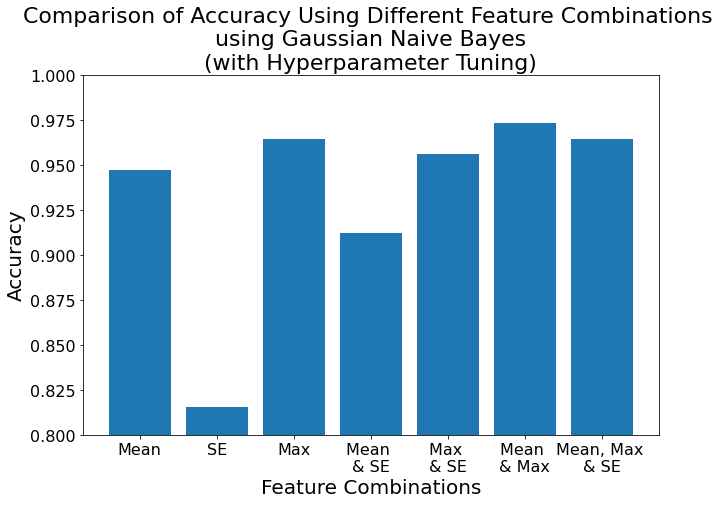

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams["font.family"] = "Times New Roman"

feature_comb = ['Mean', 'SE', 'Max', 'Mean \n& SE', 'Max \n& SE', 'Mean \n& Max', 'Mean, Max \n& SE']
accuracy = [sk_test_acc_1/100, sk_test_acc_2/100, sk_test_acc_3/100, sk_test_acc_4/100, sk_test_acc_5/100, sk_test_acc_6/100, sk_test_acc_7/100]

ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Comparison of Accuracy Using Different Feature Combinations \n using Gaussian Naive Bayes \n(with Hyperparameter Tuning)', fontsize = 22)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
plt.ylim([0.8, 1])
plt.tight_layout()
plt.savefig('Hyperparameter Tuned Dataset.png', bbox_inches = 'tight', dpi = 200)
plt.show()

# Selecting 2 parameters

In [12]:
# Extracting the columns representing the standard error and maximum values of the features
X = dataset[:,22:32]
X = X.astype("float64")
min_val = np.min(X,axis=0)
max_val = np.max(X,axis=0)
X = np.divide((X-min_val),(max_val-min_val))
final_data = np.concatenate([X,labels],axis=1)
m,n = X.shape

cv_method = RSK(n_splits = 5, n_repeats = 3)
params_NB = {'var_smoothing': np.logspace(0,-9, num = 100)}
gs_NB = GridSearchCV(estimator = GB, param_grid = params_NB, cv = cv_method,scoring = 'accuracy')

for k in range(5):
    max_f1 = 0
    for i in range(2,n):
        for j in range(i+1,n):
            x = np.concatenate((X[:,i].reshape(-1,1),X[:,j].reshape(-1,1)),axis=1)
            final_data = np.concatenate([x,labels],axis=1)
            np.random.shuffle(final_data)
            x_train = final_data[0:int(0.8*m),0:2]
            y_train = final_data[0:int(0.8*m),2]
            x_test  = final_data[int(0.8*m):,0:2]
            y_test  = final_data[int(0.8*m):,2]
            
            
        
            gs_NB.fit(x_train,y_train)
            predictions = gs_NB.predict(x_test)
            
            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
            
            f1 = (2*r*p)/(r+p)
            if f1>max_f1:
                max_f1 = f1
                index1 = i
                index2 = j
    print("F1 = {}\n".format(max_f1))
    print("Feature Combination:\n{}\n{}\n".format(X3Labels[index1],X3Labels[index2]))
    print("Indices\n{} and {}\n".format(index1,index2))
            

F1 = 0.9714261843094661

Feature Combination:
worst_perimeter
worst_smoothness

Indices
2 and 4

F1 = 0.9629953321479745

Feature Combination:
worst_area
worst_concave_points

Indices
3 and 7

F1 = 0.9629953321479745

Feature Combination:
worst_area
worst_concavity

Indices
3 and 6

F1 = 0.9710366163711202

Feature Combination:
worst_perimeter
worst_concave_points

Indices
2 and 7

F1 = 0.9717658713778586

Feature Combination:
worst_perimeter
worst_smoothness

Indices
2 and 4



# Selecting 4 parameters

In [13]:
for t in range(5):
    max_f1 = 0
    for i in range(2,n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                for l in range(k+1,n):
                            x = np.concatenate((X[:,i].reshape(-1,1),X[:,j].reshape(-1,1),X[:,k].reshape(-1,1),X[:,l].reshape(-1,1)),axis=1)
                            final_data = np.concatenate([x,labels],axis=1)
                            np.random.shuffle(final_data)
                            x_train = final_data[0:int(0.8*m),0:4]
                            y_train = final_data[0:int(0.8*m),4]
                            x_test  = final_data[int(0.8*m):,0:4]
                            y_test  = final_data[int(0.8*m):,4]
                            
                            cv_method = RSK(n_splits = 5, n_repeats = 3, random_state = 999)
                            params_NB = {'var_smoothing': np.logspace(0,-9, num = 100)}
        
                            gs_NB = GridSearchCV(estimator = GB, param_grid = params_NB, cv = cv_method,scoring = 'accuracy')
                            gs_NB.fit(x_train,y_train)
                            predictions = gs_NB.predict(x_test)
                            
                            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
                            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
                            f1 = (2*r*p)/(r+p)
                            if f1>max_f1:
                                max_f1 = f1
                                index1 = i
                                index2 = j
                                index3 = k
                                index4 = l
    print("F1 = {}\n".format(max_f1))
    print("Feature Combination:\n{}\n{}\n{}\n{}\n".format(X3Labels[index1],X3Labels[index2],X3Labels[index3],X3Labels[index4]))
    print("Indices\n{}, {}, {}, {}\n".format(index1,index2,index3,index4))

F1 = 0.9726489044016855

Feature Combination:
worst_perimeter
worst_area
worst_smoothness
worst_concave_points

Indices
2, 3, 4, 7

F1 = 0.990163085684701

Feature Combination:
worst_perimeter
worst_area
worst_smoothness
worst_compactness

Indices
2, 3, 4, 5

F1 = 0.9825688073394495

Feature Combination:
worst_perimeter
worst_area
worst_smoothness
worst_concave_points

Indices
2, 3, 4, 7

F1 = 0.9808853118712273

Feature Combination:
worst_perimeter
worst_smoothness
worst_concave_points
worst_fractal_dimension

Indices
2, 4, 7, 9

F1 = 0.9902904352269825

Feature Combination:
worst_area
worst_smoothness
worst_concave_points
worst_symmetry

Indices
3, 4, 7, 8



# Selecting 6 Parameters

In [15]:
for t in range(5):
    max_f1 = 0
    indices = [p for p in range(10)]
    for i in range(n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                for l in range(k+1,n):
                    indices.remove(i)
                    indices.remove(j)
                    indices.remove(k)
                    indices.remove(l)
                    x = np.concatenate((X[:,indices[0]].reshape(-1,1),X[:,indices[1]].reshape(-1,1),X[:,indices[2]].reshape(-1,1),X[:,indices[3]].reshape(-1,1),X[:,indices[4]].reshape(-1,1),X[:,indices[5]].reshape(-1,1)),axis=1)
                    final_data = np.concatenate([x,labels],axis=1)
                    np.random.shuffle(final_data)
                    x_train = final_data[0:int(0.8*m),0:6]
                    y_train = final_data[0:int(0.8*m),6]
                    x_test  = final_data[int(0.8*m):,0:6]
                    y_test  = final_data[int(0.8*m):,6]
                    
                    cv_method = RSK(n_splits = 5, n_repeats = 3, random_state = 999)
                    params_NB = {'var_smoothing': np.logspace(0,-9, num = 100)}
        
                    gs_NB = GridSearchCV(estimator = GB, param_grid = params_NB, cv = cv_method,scoring = 'accuracy')
                    gs_NB.fit(x_train,y_train)
                    gs_NB.fit(x_test,y_test)
                    predictions = gs_NB.predict(x_test)
                    
                    p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
                    r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
                    f1 = (2*r*p)/(r+p)
                    if f1 > max_f1:
                        max_f1 = f1
                        optimal_indices = indices
                    indices = [p for p in range(10)]
    print("F1 = {}\n".format(max_f1))
    for i in optimal_indices:
        print(X3Labels[i])
    for i in optimal_indices:
        print(i)
    print("\n")
    

F1 = 0.9822208359326263

worst_texture
worst_perimeter
worst_area
worst_compactness
worst_concavity
worst_symmetry
1
2
3
5
6
8


F1 = 0.9898765651363112

worst_radius
worst_texture
worst_perimeter
worst_smoothness
worst_concavity
worst_concave_points
0
1
2
4
6
7


F1 = 1.0

worst_radius
worst_perimeter
worst_smoothness
worst_compactness
worst_concave_points
worst_fractal_dimension
0
2
4
5
7
9


F1 = 1.0

worst_radius
worst_texture
worst_area
worst_concave_points
worst_symmetry
worst_fractal_dimension
0
1
3
7
8
9


F1 = 0.9907923431063728

worst_radius
worst_perimeter
worst_area
worst_concavity
worst_symmetry
worst_fractal_dimension
0
2
3
6
8
9




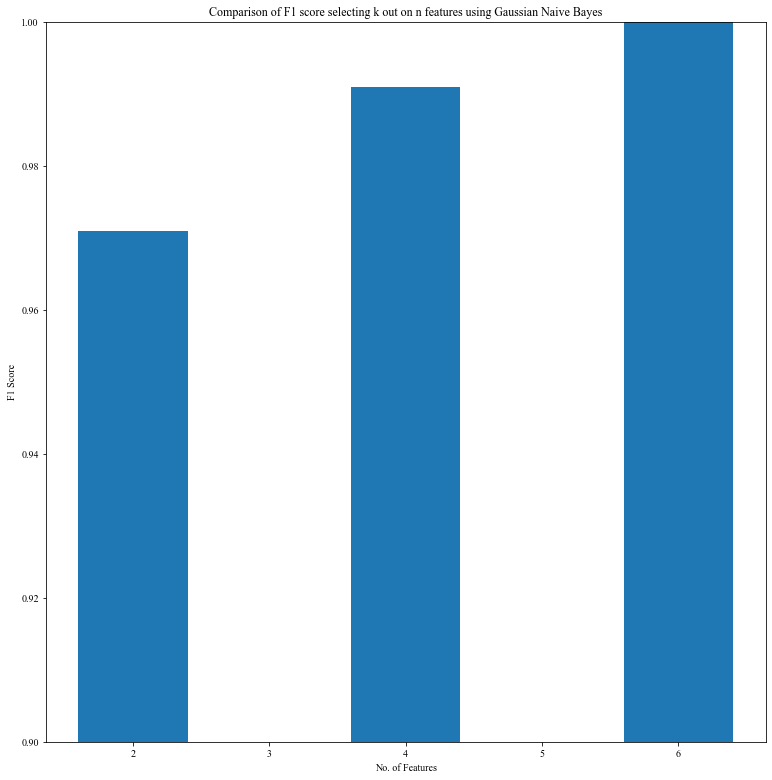

In [16]:
# The F1 score of the k best features selected taking into consideration all possible permutations and combinations.
# The bar graph is made for k=2,4,6,8
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
features = [2,4,6]
F1 = [0.971,0.991,1.0]
ax.bar(features,F1)
ax.set_xlabel('No. of Features')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 score selecting k out on n features using Gaussian Naive Bayes')
ax.set_ylim([0.9,1])
plt.show()

In [20]:
import time

def skNBSolver2(final_data, columns):
    report = np.zeros([4, 6]) #row, column
    m,n = final_data.shape
    np.random.seed(0)
    elapsedTime = 0
    for i in range(5):
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),columns]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,columns]
        y_test  = final_data[int(0.8*m):,n-1]
        
        start = time.time()
        cv_method = RSK(n_splits = 5, n_repeats = 3, random_state = 999)
        params_NB = {'var_smoothing': np.logspace(0,-9, num = 100)}
        
        gs_NB = GridSearchCV(estimator = GB, param_grid = params_NB, cv = cv_method,scoring = 'accuracy')
        gs_NB.fit(x_train,y_train)
        gs_NB.fit(x_test,y_test)
        
        stop = time.time()
        elapsedTime = elapsedTime + (stop - start)
        
        sk_train_acc = gs_NB.score(x_train,y_train) * 100
        sk_test_acc = gs_NB.score(x_test,y_test) * 100
        predictions = gs_NB.predict(x_test)
    
        report[0,i] = (classification_report(y_test,predictions, output_dict=True).get('accuracy'))
        report[1,i] = (classification_report(y_test,predictions, output_dict=True).get('macro avg').get('precision'))
        report[2,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('recall'))
        report[3,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('f1-score'))
        print(classification_report(y_test,predictions))

        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)
    
    #reporting the maximum values for each row
    for i in range(4):
        report[i,5]= max(report[i,0:5])
    
    
    columns = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
    index = ["Accuracy", "Precision", "Recall", "F1 Score"]
    df1 = pd.DataFrame(data = report, columns = columns, index = index)
    display(df1)
    elapsedTime = elapsedTime/5
    
    ##############
    return sk_train_acc, sk_test_acc, elapsedTime

In [21]:
sk_train_acc_feat1, sk_test_acc_feat1, elapsedTime1 = skNBSolver2(final_data3, [0, 2, 3, 6, 8, 9])
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_feat1))
print("\nAverage Elapsed Time per Validation: {:.2f} ms\n".format(elapsedTime1))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        77
         1.0       1.00      0.89      0.94        37

    accuracy                           0.96       114
   macro avg       0.98      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
 [[77  0]
 [ 4 33]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        80
         1.0       1.00      0.94      0.97        34

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion matrix:
 [[80  0]
 [ 2 32]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        66
         1.0       0.98      0.90      0.93        48

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.964912,0.982456,0.947368,0.947368,0.973684,0.982456
Precision,0.975309,0.987805,0.952922,0.957746,0.973846,0.987805
Recall,0.945946,0.970588,0.940341,0.938776,0.968243,0.970588
F1 Score,0.958770,0.978676,0.945332,0.945332,0.970946,0.978676



Test accuracy using sklearn: 97.37%


Average Elapsed Time per Validation: 3.37 ms



In [24]:
sk_train_acc_feat2, sk_test_acc_feat2, elapsedTime2 = skNBSolver2(final_data3, [0, 1, 3, 7, 8, 9])
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_feat2))
print("\nAverage Elapsed Time per Validation: {:.2f} ms\n".format(elapsedTime2))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        72
         1.0       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[69  3]
 [ 2 40]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        66
         1.0       0.94      0.96      0.95        48

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[63  3]
 [ 2 46]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        73
         1.0       0.95      0.98      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.956140,0.956140,0.973684,0.956140,0.956140,0.973684
Precision,0.951032,0.954003,0.969246,0.953947,0.956202,0.969246
Recall,0.955357,0.956439,0.974106,0.948205,0.953160,0.974106
F1 Score,0.953106,0.955143,0.971583,0.950976,0.954600,0.971583



Test accuracy using sklearn: 95.61%


Average Elapsed Time per Validation: 3.46 ms



In [25]:
sk_train_acc_feat3, sk_test_acc_feat3, elapsedTime3 = skNBSolver2(final_data3, [0, 2, 4, 5, 7, 9])
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc_feat3))
print("\nAverage Elapsed Time per Validation: {:.2f} ms\n".format(elapsedTime3))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        65
         1.0       0.98      1.00      0.99        49

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion matrix:
 [[64  1]
 [ 0 49]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        69
         1.0       0.98      1.00      0.99        45

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion matrix:
 [[68  1]
 [ 0 45]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        73
         1.0       0.93      0.95      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.991228,0.991228,0.956140,0.982456,0.973684,0.991228
Precision,0.990000,0.989130,0.950397,0.974359,0.980769,0.990000
Recall,0.992308,0.992754,0.955062,0.987013,0.961538,0.992754
F1 Score,0.991074,0.990856,0.952638,0.980263,0.970196,0.991074



Test accuracy using sklearn: 97.37%


Average Elapsed Time per Validation: 3.46 ms

